# **2D Object Detection Project on a Video Clip**

## **Project Overview**
Object detection plays a crucial role in autonomous driving by enabling vehicles to perceive and interpret their surroundings with high accuracy. In this project, we develop a deep learning model using YOLOv8 to detect and classify cyclists, pedestrians, and vehicles in urban environments. The model will be trained and fine-tuned on the COCO (Common Objects in Context) dataset, which contains diverse real-world images with annotated objects commonly found in urban settings, such as cars, bicycles, and pedestrians.


## **Dataset**
In this project, we employed the COCO (Common Objects in Context) dataset, a prominent benchmark in computer vision for tasks like object detection, segmentation, and recognition. COCO offers a diverse array of images annotated with 80 common object categories, including pedestrians, cyclists, and vehicles, which are crucial for our urban detection application. The dataset comprises thousands of high-quality, real-world images taken in various settings, making it perfect for training deep learning models to recognize objects in dynamic, cluttered environments.

COCO's extensive annotations include bounding boxes, instance segmentation masks, and keypoints, enabling precise detection and classification. Its real-world variety ensures that our model generalizes well across different lighting conditions, occlusions, and urban scenarios. For training, we utilize the COCO dataset's structured format, converting annotations into a format compatible with YOLOv8. Furthermore, data preprocessing techniques such as resizing, normalization, and augmentation are applied to boost model performance.




## **Setup**  

To prepare the environment for this project, we install and import the necessary libraries required for **YOLOv8-based object detection, data processing, and visualization**. The setup includes **Ultralytics' YOLO library**, which provides a streamlined interface for training and inference, along with essential libraries like **Torch, OpenCV, NumPy, Matplotlib, and PIL** for handling image processing, visualization, and performance evaluation.  

The **COCO dataset tools (`pycocotools`)** are included to work with dataset annotations efficiently, enabling the extraction of labeled objects such as **pedestrians, cyclists, and vehicles**. Additionally, **Torchvision transforms** help preprocess images before feeding them into the model. The setup also incorporates utilities for handling file downloads and extractions, ensuring seamless access to the dataset and model weights.  



In [1]:
# Install necessary libraries
!pip install ultralytics
!pip install imageio[ffmpeg]

# Import necessary libraries
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pycocotools.coco import COCO
from torchvision import transforms
from PIL import Image
import requests
import zipfile
import os
import time
import imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [3]:
# Verify dataset paths
data_dir = './datasets/coco'
if not os.path.exists(f'{data_dir}/images/train2017'):
    os.makedirs(f'{data_dir}/images/train2017')
if not os.path.exists(f'{data_dir}/images/val2017'):
    os.makedirs(f'{data_dir}/images/val2017')
if not os.path.exists(f'{data_dir}/images/test2017'):
    os.makedirs(f'{data_dir}/images/test2017')
if not os.path.exists(f'{data_dir}/labels/train2017'):
    os.makedirs(f'{data_dir}/labels/train2017')
if not os.path.exists(f'{data_dir}/labels/val2017'):
    os.makedirs(f'{data_dir}/labels/val2017')
if not os.path.exists(f'{data_dir}/labels/test2017'):
    os.makedirs(f'{data_dir}/labels/test2017')


In [4]:
# Download and unzip dataset if not already present
if not os.path.exists(f'{data_dir}/annotations'):
    !wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P {data_dir}
    !unzip -q {data_dir}/annotations_trainval2017.zip -d {data_dir}

if not os.path.exists(f'{data_dir}/images/train2017.zip'):
    !wget http://images.cocodataset.org/zips/train2017.zip -P {data_dir}/images
    !unzip -q {data_dir}/images/train2017.zip -d {data_dir}/images

if not os.path.exists(f'{data_dir}/images/val2017.zip'):
    !wget http://images.cocodataset.org/zips/val2017.zip -P {data_dir}/images
    !unzip -q {data_dir}/images/val2017.zip -d {data_dir}/images

if not os.path.exists(f'{data_dir}/images/test2017.zip'):
    !wget http://images.cocodataset.org/zips/test2017.zip -P {data_dir}/images
    !unzip -q {data_dir}/images/test2017.zip -d {data_dir}/images


--2025-03-17 09:10:27--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.217.113, 52.216.88.243, 52.216.54.73, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.217.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘./datasets/coco/annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  20.2MB/s    in 14s     

2025-03-17 09:10:42 (17.0 MB/s) - ‘./datasets/coco/annotations_trainval2017.zip’ saved [252907541/252907541]

--2025-03-17 09:10:51--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.106.12, 52.217.119.81, 52.216.205.179, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.106.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [applic

In [5]:
# Ensure coco.yaml is in the right folder
coco_yaml_path = f'{data_dir}/coco.yaml'
if not os.path.exists(coco_yaml_path):
    with open(coco_yaml_path, 'w') as f:
        f.write('''train: datasets/coco/images/train2017
val: datasets/coco/images/val2017
test: datasets/coco/images/test2017

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: bus
  5: truck''')

## **YOLOv8 Model Selection**  

We leverage YOLOv8, the latest iteration of the You Only Look Once (YOLO) series, which is widely regarded for its real-time object detection capabilities. YOLOv8 is a powerful deep learning model optimized for speed, accuracy, and versatility, making it ideal for applications like autonomous driving, traffic monitoring, and pedestrian detection.  

Compared to its predecessors, YOLOv8 introduces several architectural improvements, including an anchor-free detection mechanism, an optimized CSPDarknet backbone, and better feature fusion strategies, allowing it to detect objects with greater precision, especially in crowded urban environments. The model is designed to efficiently process video frames while maintaining high inference speeds, making it well-suited for real-time object detection in dynamic scenes.  

In this project, we utilize YOLOv8’s pre-trained weights on the COCO dataset and fine-tune it for improved recognition of pedestrians, cyclists, and vehicles. The model is capable of handling multiple objects simultaneously, with robust performance across various lighting and occlusion conditions.
For this project, we utilize the YOLOv8x model, which is the largest and most powerful variant in the YOLOv8 series, to achieve high-accuracy object detection. The model is initialized with pre-trained weights from the `yolov8x.pt` checkpoint and deployed on the designated device (CPU or GPU) for efficient processing:  

```python
model = YOLO('yolov8x.pt').to(device)
```  

The YOLOv8x model excels in detection capabilities due to its larger backbone, increased number of parameters, and improved feature extraction, making it highly effective for identifying pedestrians, cyclists, and vehicles in complex urban scenes. Although it demands more computational resources compared to smaller YOLOv8 variants, its proficiency in accurately detecting small and occluded objects makes it ideal for real-world traffic monitoring, autonomous navigation, and safety applications**.

## **Dataset Analysis**  

The dataset analysis offers a comprehensive understanding of the distribution of images, object categories, and annotation statistics within the COCO dataset. This step is essential to ensure that our model is trained on a well-structured and representative dataset for object detection tasks.  

First, we identify the categories of interest, specifically pedestrians, bicycles, cars, motorcycles, buses, and trucks, and extract their respective category IDs. This allows us to filter relevant objects and focus on analyzing their distribution within the dataset.  

An important part of this analysis is the class distribution, which helps determine the prevalence of each object type in both the training and validation datasets. By counting the number of instances per category, we can identify potential class imbalances that might affect model performance. A bar chart visualization further illustrates the dataset’s distribution across different object categories, indicating whether additional data augmentation or re-weighting techniques might be necessary.  

Moreover, we examine the image size distribution, ensuring that the dataset contains a diverse range of image resolutions. This is crucial for optimizing the model’s ability to detect objects at various scales. A histogram of image widths and heights provides insights into whether image resizing and normalization are needed for model training.  

Finally, we calculate the total number of annotations, which provides a broader perspective on how many labeled instances exist within the dataset. This metric is vital for understanding the dataset’s complexity and ensuring that it contains sufficient labeled examples for each class.  

Through this dataset analysis, we gain valuable insights that help in fine-tuning YOLOv8 for real-world urban object detection, ensuring a well-balanced, diverse, and high-quality training dataset.

In [6]:
## Dataset
# Set paths to the dataset
train_annotations_path = f'{data_dir}/annotations/instances_train2017.json'
val_annotations_path = f'{data_dir}/annotations/instances_val2017.json'
train_images_dir = f'{data_dir}/images/train2017'
val_images_dir = f'{data_dir}/images/val2017'

In [7]:
# Initialize COCO API for instance annotations
coco_train = COCO(train_annotations_path)
coco_val = COCO(val_annotations_path)

loading annotations into memory...
Done (t=18.15s)
creating index...
index created!
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


Category IDs: [1, 2, 3, 4, 6, 8]


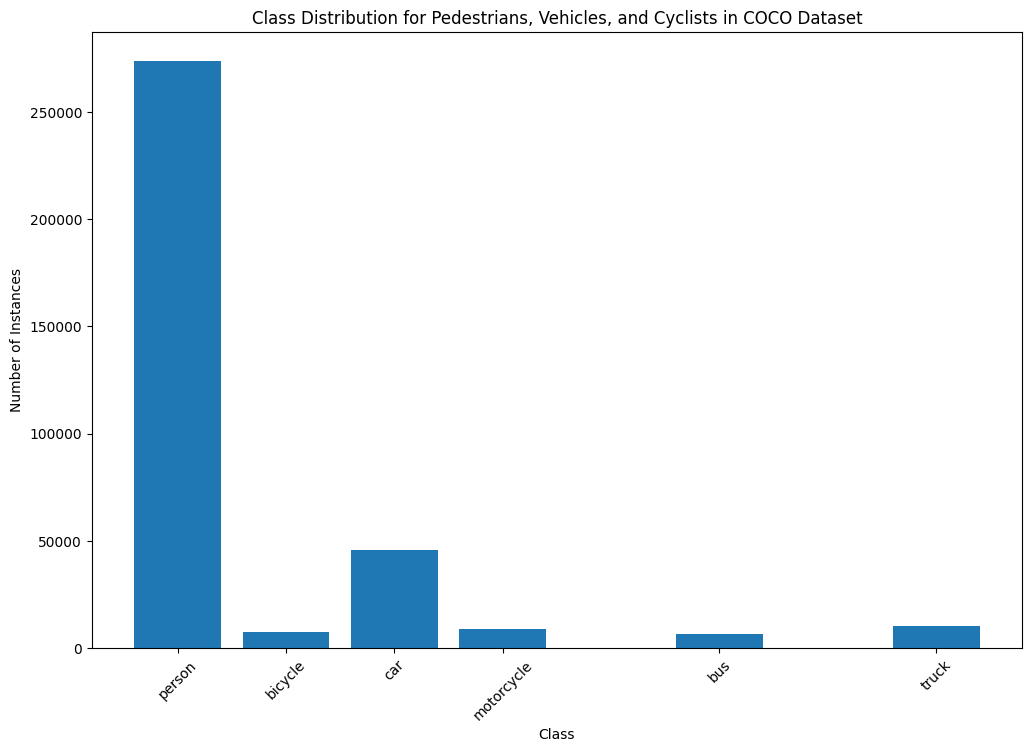

Total Instances: {1: 273469, 2: 7429, 3: 45799, 4: 9096, 6: 6354, 8: 10388}


In [8]:
# Define the categories of interest: pedestrian, vehicles, and cyclists
categories_of_interest = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'truck']

# Get category IDs for the categories of interest
cat_ids = coco_train.getCatIds(catNms=categories_of_interest)
print(f'Category IDs: {cat_ids}')

# Function to count class distribution
def count_class_distribution(coco, cat_ids):
    class_counts = {cat_id: 0 for cat_id in cat_ids}
    img_ids = coco.getImgIds()
    for img_id in img_ids:
        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(ann_ids)
        for ann in anns:
            class_counts[ann['category_id']] += 1
    return class_counts

# Count class distribution in training and validation sets
train_class_counts = count_class_distribution(coco_train, cat_ids)
val_class_counts = count_class_distribution(coco_val, cat_ids)

# Combine class counts from training and validation sets
total_class_counts = {cat_id: train_class_counts[cat_id] + val_class_counts[cat_id] for cat_id in cat_ids}

# Get category names
cat_names = coco_train.loadCats(cat_ids)
cat_names_dict = {cat['id']: cat['name'] for cat in cat_names}

# Plot class distribution
plt.figure(figsize=(12, 8))
plt.bar(total_class_counts.keys(), total_class_counts.values(), tick_label=[cat_names_dict[cat_id] for cat_id in total_class_counts.keys()])
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution for Pedestrians, Vehicles, and Cyclists in COCO Dataset')
plt.xticks(rotation=45)
plt.show()

# Total Instances for Each Category of Interest
def count_instances(coco, cat_ids):
    total_instances = {cat_id: 0 for cat_id in cat_ids}
    ann_ids = coco.getAnnIds(catIds=cat_ids)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        total_instances[ann['category_id']] += 1
    return total_instances

total_train_instances = count_instances(coco_train, cat_ids)
total_val_instances = count_instances(coco_val, cat_ids)

total_instances = {cat_id: total_train_instances[cat_id] + total_val_instances[cat_id] for cat_id in cat_ids}
print(f"Total Instances: {total_instances}")

Number of images: 118287


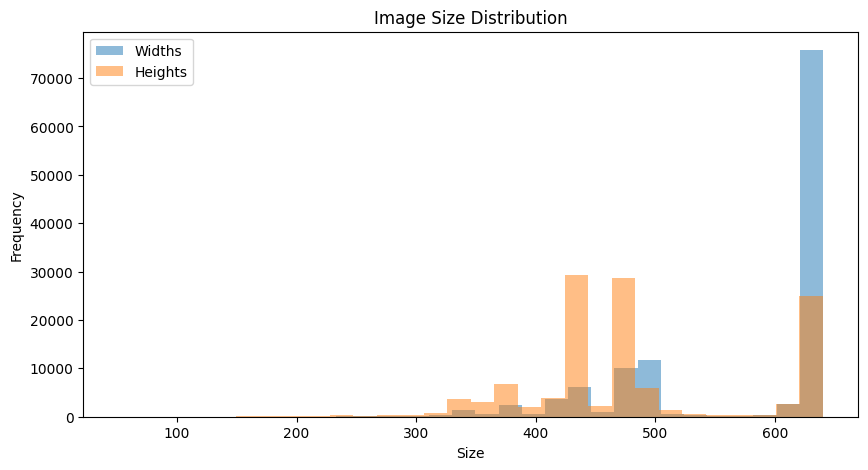

Number of annotations: 338212


In [9]:
def analyze_dataset(coco):
    img_ids = coco.getImgIds()
    num_images = len(img_ids)
    print(f'Number of images: {num_images}')

    # Analyze image sizes and resolutions
    img_sizes = []
    for img_id in img_ids:
        img_info = coco.loadImgs(img_id)[0]
        img_sizes.append((img_info['width'], img_info['height']))

    # Plot image size distribution
    widths, heights = zip(*img_sizes)
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=30, alpha=0.5, label='Widths')
    plt.hist(heights, bins=30, alpha=0.5, label='Heights')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Image Size Distribution')
    plt.show()

    # Analyze number of annotations
    ann_ids = coco.getAnnIds(catIds=cat_ids)
    num_annotations = len(ann_ids)
    print(f'Number of annotations: {num_annotations}')

analyze_dataset(coco_train)


In [16]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8x.pt').to('cuda')

# Train the model using YOLOv8 built-in training function
model.train(data=f'{data_dir}/coco.yaml', epochs=10, imgsz=640, batch=16, device='cuda')

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=./datasets/coco/coco.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

RuntimeError: Dataset 'datasets/coco/coco.yaml' error ❌ 
Dataset 'datasets/coco/coco.yaml' images not found ⚠️, missing path '/content/datasets/datasets/coco/datasets/coco/images/val2017'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
## Improve on the reference
# Evaluate the model on the validation set after training
print("Evaluating model after training...")
model.eval()
with torch.no_grad():
    val_loss = 0.0
    for images, targets in val_loader:
        images = images.to(device)
        outputs = model(images)
        # Ensure outputs are in correct format
        outputs = [{'boxes': output.boxes.xyxy, 'labels': output.boxes.cls} for output in outputs]
        try:
            loss = custom_loss_function(outputs, targets)
            val_loss += loss.item()  # Correctly access the loss value
        except Exception as e:
            print(f"Error calculating loss: {e}")
    print(f'Validation Loss (after training): {val_loss / len(val_loader):.4f}')


In [ ]:
## Analysis of the Results

# Accuracy
from pycocotools.cocoeval import COCOeval

def evaluate_model(model, data_loader, coco_gt, device):
    model.eval()
    results = []
    with torch.no_grad():
        for images, targets in data_loader:
            images = images.to(device)
            outputs = model(images)
            for image_id, output in zip([t['image_id'] for t in targets], outputs):
                boxes = output.boxes.xyxy.cpu().numpy()
                scores = output.boxes.conf.cpu().numpy()
                labels = output.boxes.cls.cpu().numpy()

                for box, score, label in zip(boxes, scores, labels):
                    result = {
                        'image_id': image_id.item(),
                        'category_id': int(label),
                        'bbox': box.tolist(),
                        'score': float(score)
                    }
                    results.append(result)

    # Load results into COCO format and evaluate
    coco_dt = coco_gt.loadRes(results)
    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    return coco_eval.stats

# Evaluate the model on the validation set
coco_gt = coco_val
val_stats = evaluate_model(model, val_loader, coco_gt, device)

# Print mAP
print(f"Mean Average Precision (mAP) @[IoU=0.50:0.95 | area=all | maxDets=100]: {val_stats[0]:.4f}")



In [ ]:
## Speed
def measure_speed(model, data_loader, device):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            outputs = model(images)
    end_time = time.time()

    total_time = end_time - start_time
    avg_time_per_image = total_time / len(data_loader.dataset)
    fps = 1 / avg_time_per_image

    return avg_time_per_image, fps

# Measure speed on the validation set
avg_time_per_image, fps = measure_speed(model, val_loader, device)
print(f'Average time per image: {avg_time_per_image:.4f}s, FPS: {fps:.2f}')


In [ ]:
## Visualization of Results
# Visualize the results on a video clip
def visualize_results(video_path, model, device):
    cap = cv2.VideoCapture(video_path)
    out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (640, 480))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            outputs = model(image)

        for output in outputs:
            boxes = output.boxes.xyxy.cpu().numpy()
            labels = output.boxes.cls.cpu().numpy()
            for box, label in zip(boxes, labels):
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, str(int(label)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

visualize_results('/path/to/video.mp4', model, device)

# Convert the output video to GIF
def video_to_gif(video_path, gif_path):
    reader = imageio.get_reader(video_path)
    fps = reader.get_meta_data()['fps']
    writer = imageio.get_writer(gif_path, fps=fps)
    for frames in reader:
        writer.append_data(frames)
    writer.close()

video_to_gif('output.avi', 'output.gif')